In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # matplotlib is a low level graph plotting library in python that serves as a visualization utility.
import seaborn as sns # seaborn is a statistical data visualization toll.

In [2]:
data = pd.read_csv(r"C:\Users\dibak\Downloads\menu.csv") 
data.head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8


In [3]:
data.shape

(260, 24)

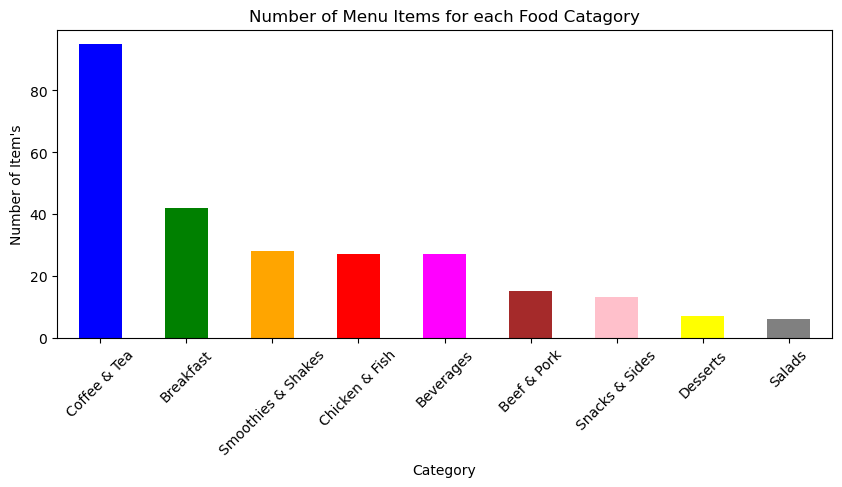

In [7]:
plt.figure(figsize=(10, 4), dpi=100) 
menu_category = data.Category.value_counts() 
menu_category.plot.bar(color = ['blue','green','orange','red','magenta','brown','pink','yellow','grey']) #graph color
plt.title("Number of Menu Items for each Food Catagory") # Graphs Main Label on the Top
plt.ylabel("Number of Item's") 
plt.xlabel("Category") 
plt.xticks(rotation=45) 
plt.show() 

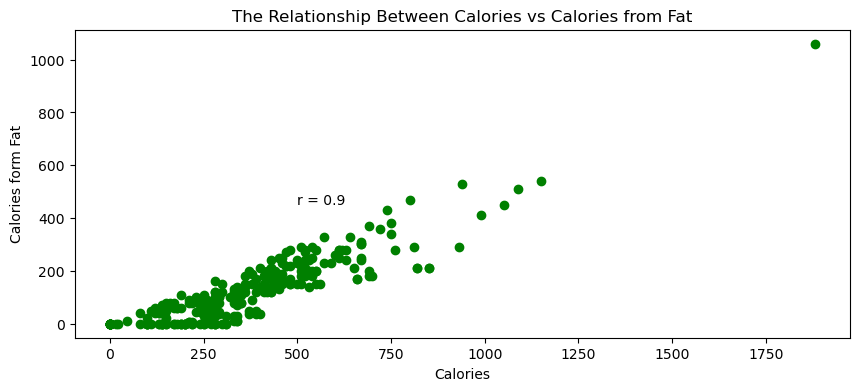

In [8]:
plt.figure(figsize=(10, 4), dpi=100) 

correlation = data['Calories'].corr(data['Calories from Fat']) 
plt.scatter(data.Calories, data['Calories from Fat'], color='green') 
plt.text(500,450, 'r = {}'.format(round(correlation,2)))
plt.xlabel("Calories")
plt.ylabel("Calories form Fat")
plt.title("The Relationship Between Calories vs Calories from Fat")
plt.show()


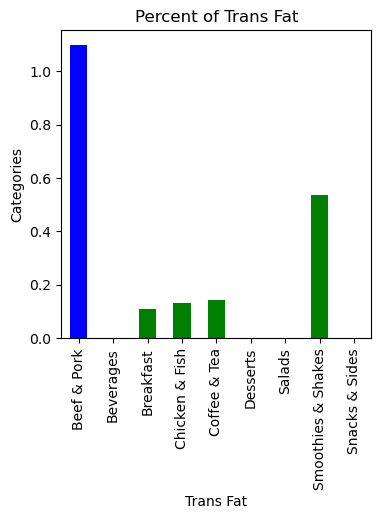

In [9]:
plt.figure (figsize=(4, 4), dpi=100) #input plot size
menu_category = data.groupby('Category')['Trans Fat'].mean()
menu_category.plot.bar(color = ['blue','green','green','green','green','green','green','green','green'])
plt.title("Percent of Trans Fat")
plt.xlabel("Trans Fat")
plt.ylabel("Categories")
plt.xticks(rotation=90)
plt.show()


In [10]:
data.groupby('Category')['Trans Fat'].mean()

Category
Beef & Pork           1.100000
Beverages             0.000000
Breakfast             0.107143
Chicken & Fish        0.129630
Coffee & Tea          0.142105
Desserts              0.000000
Salads                0.000000
Smoothies & Shakes    0.535714
Snacks & Sides        0.000000
Name: Trans Fat, dtype: float64

In [11]:
data['saturated_cholesterol'] = data['Saturated Fat']/data['Cholesterol']*100

In [12]:
saturated_cholesterol = data.groupby('Category')['saturated_cholesterol'].mean().dropna().nlargest(5)

In [17]:
beef_pork = data[data.Category == 'Beef & Pork']
beef_pork.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Hamburger                                    10.000000
McDouble                                     10.666667
Bacon McDouble                               11.111111
Cheeseburger                                 11.111111
Double Cheeseburger                          11.111111
Daily Double                                 11.250000
Jalapeño Double                              11.250000
Big Mac                                      11.764706
Double Quarter Pounder with Cheese           11.875000
Quarter Pounder with Bacon & Cheese          12.380952
Quarter Pounder with Bacon Habanero Ranch    12.380952
Quarter Pounder with Cheese                  12.631579
Quarter Pounder Deluxe                       12.941176
Bacon Clubhouse Burger                       13.043478
McRib                                        14.285714
Name: saturated_cholesterol, dtype: float64

In [18]:
chicken_fish = data[data.Category == 'Chicken & Fish']
chicken_fish.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Premium Grilled Chicken Classic Sandwich                 3.076923
Premium McWrap Chicken Sweet Chili (Grilled Chicken)     4.615385
Premium Grilled Chicken Ranch BLT Sandwich               5.000000
Southern Style Crispy Chicken Sandwich                   6.666667
Premium Grilled Chicken Club Sandwich                    6.666667
Bacon Clubhouse Grilled Chicken Sandwich                 7.272727
Premium McWrap Chicken & Bacon (Grilled Chicken)         7.368421
Chicken McNuggets (20 piece)                             7.407407
Premium McWrap Chicken & Ranch (Grilled Chicken)         7.500000
Premium McWrap Southwest Chicken (Grilled Chicken)       7.500000
Chicken McNuggets (6 piece)                              7.500000
Chicken McNuggets (40 piece)                             7.547170
Chicken McNuggets (10 piece)                             7.692308
Premium Crispy Chicken Classic Sandwich                  7.777778
Chicken McNuggets (4 piece)                              8.000000
McChi

In [19]:
data.groupby('Category')['Vitamin A (% Daily Value)'].mean()

Category
Beef & Pork             6.933333
Beverages               0.740741
Breakfast               6.928571
Chicken & Fish         20.444444
Coffee & Tea           10.736842
Desserts                5.142857
Salads                146.666667
Smoothies & Shakes     18.750000
Snacks & Sides          4.846154
Name: Vitamin A (% Daily Value), dtype: float64

In [20]:
data.groupby('Category')['Vitamin C (% Daily Value)'].mean()

Category
Beef & Pork            7.333333
Beverages             23.481481
Breakfast              8.904762
Chicken & Fish        12.629630
Coffee & Tea           0.000000
Desserts               4.142857
Salads                28.333333
Smoothies & Shakes     6.964286
Snacks & Sides        28.153846
Name: Vitamin C (% Daily Value), dtype: float64

In [21]:
beverage = data[data.Category == 'Beverages']
beverage.groupby('Item')['Vitamin C (% Daily Value)'].mean().sort_values()

Item
Diet Dr Pepper (Small)                 0.0
Sprite (Large)                         0.0
Sprite (Child)                         0.0
Fat Free Chocolate Milk Jug            0.0
Dr Pepper (Small)                      0.0
Dr Pepper (Medium)                     0.0
Dr Pepper (Large)                      0.0
Dr Pepper (Child)                      0.0
Sprite (Medium)                        0.0
Diet Dr Pepper (Medium)                0.0
Diet Dr Pepper (Large)                 0.0
Sprite (Small)                         0.0
Diet Coke (Small)                      0.0
Diet Coke (Medium)                     0.0
Diet Coke (Large)                      0.0
Diet Coke (Child)                      0.0
Dasani Water Bottle                    0.0
Coca-Cola Classic (Small)              0.0
Coca-Cola Classic (Medium)             0.0
Coca-Cola Classic (Large)              0.0
Coca-Cola Classic (Child)              0.0
Diet Dr Pepper (Child)                 0.0
1% Low Fat Milk Jug                    4.0
Minute

In [22]:
iron = data.groupby('Category')['Iron (% Daily Value)'].mean()
calcium = data.groupby('Category')['Calcium (% Daily Value)'].mean()

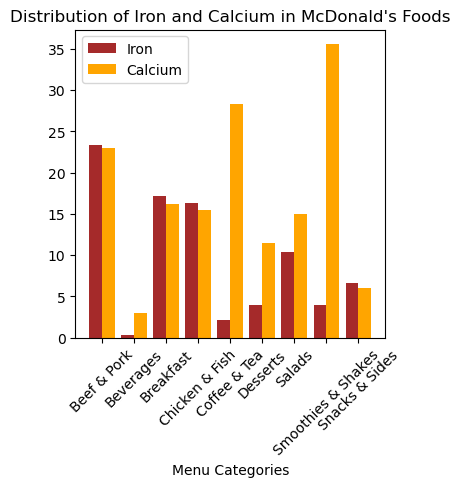

In [24]:
plt.figure(figsize=(4, 4), dpi=100)

category = iron.index
Iron = iron.values
Calcium = calcium.values

X_axis = np.arange(len(category))

plt.bar(X_axis - 0.2, Iron, 0.4, label = 'Iron', color = 'brown')
plt.bar(X_axis + 0.2, Calcium, 0.4, label = 'Calcium', color = 'orange')

plt.xticks(X_axis, category)
plt.xlabel("Menu Categories")
plt.title("Distribution of Iron and Calcium in McDonald's Foods")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Conclusion
This comprehensive analysis delves into the McDonald's Menu, providing detailed nutritional information for each food category. By reviewing this analysis, individuals can make informed choices based on their preferences and dietary requirements.

Many items on McDonald's menu, particularly salads, are notably high in vitamins like Vitamin A and C, while most items are low in carbohydrates and contain little to no trans-fat, which is a positive aspect. However, it's crucial to be mindful of the high saturated fat content in many menu items; those seeking to limit their saturated fat intake should opt for items with less than 10% saturated fat. Additionally, the analysis includes insights into essential minerals such as calcium and iron, revealing that menu items containing milk or animal protein are particularly rich in calcium.